# The shared-house market in Europe

## Libraries and documents

In [51]:
import pandas as pd
import regex as re
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as px

In [57]:
bcn = pd.read_csv("../housekeeper/bcn.csv", header=None)
madrid = pd.read_csv("../housekeeper/madrid.csv", header=None)
london = pd.read_csv("../housekeeper/london.csv", header=None)
berlin = pd.read_csv("../housekeeper/berlin.csv", header=None)

## Data processing

In [58]:
def df_processor(df, name):
    """ Function that takes the df with the scraped information from each city and cleans it """
    
    df = df.drop_duplicates() #Dropping duplicated
    df.columns = ["title", "price", "details"] #Renaming columns

    df[["room", "flatmates"]] = df["details"].str.split("·", n=1, expand=True) # Splitting the details column

    #The flatmates column
    df["flatmates"] = df["flatmates"].str.rstrip(" COMPANYS DE PIS")#Deleting the str "companys de pis"

    #The room column
    df["room"] = df["room"].str.lower().str.strip() #Changing str as lowercase and removing whitespaces
    df = df.drop(columns="details") #Deleting the column

    #Filtering only "private room" & "shared room" as we are interested in this kind
    values = ["habitació compartida", "habitació privada"]
    df = df.loc[df['room'].isin(values)].copy() #Creating a copy of the df
    df["room"] = df["room"].replace("habitació privada", "private").replace("habitació compartida", "shared")

    #Dealing with the prices column
    df["price"] = df["price"].str.rstrip(" €/mes") #Deleting final string
    df["price"] = df["price"].str.rstrip(" £/mes")
    df["price"] = df["price"].str.rstrip(" $/mes")
    df["price"] = [re.sub(r'\d...','', str(x)) for x in df["price"]] #Deleting strikeout format string 
    df["price"] = df["price"].str.lstrip("€̶ ") #Deleting € symbols at the begining of str
    df["price"] = df["price"].str.lstrip("£̶ ") 
    df["price"] = df["price"].replace('-', np.nan) #Replacing - symbol to NaN value

    df = df.dropna() #Deleting rows with null values
    df[["price", "flatmates"]] = df[["price", "flatmates"]].apply(pd.to_numeric) #Changing price and nº flatmates to numeric
    df["flatmates"] = df["flatmates"].fillna(0) #Set nans to 0 for nº flatmates
    df["flatmates"] = df["flatmates"].astype(int)
    df["city"] = name # Create column with city name for concatenating df later
    
    return df

In [59]:
# Applying the function to the cities dfs
bcn = df_processor(bcn, "Barcelona")
madrid = df_processor(madrid, "Madrid")
london = df_processor(london, "London")
berlin = df_processor(berlin, "Berlin")

#Concatenating the datasets into one for analysis
datasets = [bcn, madrid, london, berlin]
df = pd.concat(datasets).reset_index(drop=True)

## Data analysis

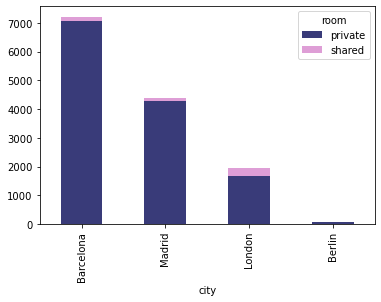

In [98]:
df_1 = df.groupby(["city", "room"])["city"].count().unstack("room").fillna(0)
df_1[['private','shared']].sort_values(by="private", ascending=False).plot(kind='bar', stacked=True, colormap="tab20b")
plt.show()

In [119]:
df_2 = df.groupby(["city", "flatmates"])["city"].count().unstack("flatmates").fillna(0)
df_2["+10"] = df_2.iloc[:, 10:21].sum(axis=1)

In [120]:
df_2.drop

flatmates,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,18,20,+10
city,,,,,,,,,,,,,,,,,,
Barcelona,392.0,1619.0,2853.0,1638.0,504.0,100.0,61.0,20.0,13.0,5.0,5.0,0.0,2.0,4.0,2.0,0.0,0.0,13.0
Berlin,44.0,8.0,8.0,4.0,5.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
London,409.0,275.0,448.0,285.0,369.0,101.0,27.0,15.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,4.0
Madrid,311.0,1015.0,1715.0,874.0,305.0,69.0,44.0,20.0,6.0,5.0,8.0,1.0,4.0,0.0,0.0,0.0,1.0,14.0


In [100]:
df['Fruit Total']= df.iloc[:, -4:-1].sum(axis=1)

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 18, 20], dtype='int64', name='flatmates')

In [90]:
df_1.columns

Index(['private', 'shared'], dtype='object', name='room')

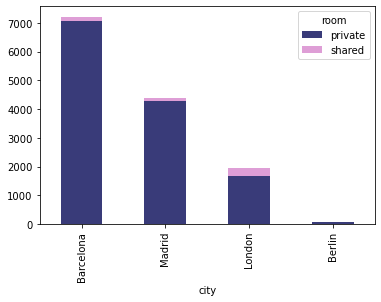

In [62]:
df_1.plot()

room,private,shared
city,,
Barcelona,7085,133
Berlin,66,6
London,1662,274
Madrid,4295,83


In [ ]:
df2[[""]]